In [1]:
import sys
sys.path.append("/mnt/c/Users/dambr/Desktop/AstroCosmoComputational/Students/Anna_DAmbrosio/")

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",})

# Import pyACC logger
from pyACC.helpers import Logger

# Set the logger
#print = Logger("IMF computation")

# Import your integration methods
from pyACC.Calculus import intgr

# Initial Mass function

In this exercise we will play with the Initial Mass function (IMF).

The IMF is a key concept in stellar populations. It the defines how star mass is distributed 
in a single formation event of a stellar population (SSP). 

This quantity is at the core of many astrophysical studies, from star clusters (open/globular)
to galaxies, and it's fundamental to explain observational properties of the object in study.

You will find different assumptions for this distribution in literature. 
The more traditional is a power-law (Salpeter 1955):

$$ \xi(M) = \xi_0 M^{-\alpha}; $$

where M is the mass in solar masses unit, $\xi_0$ is a normalisation 
constant and $\alpha$ is power-law exponent A common assumption is $\alpha=2.35$.
Other, more recent definitions for the IMF are Kroupa (2002) (double power-law) and Chabrier (2003)

Starting from the IMF, we will compute some key quantities of the stellar population.

In [2]:
# Let's define the python function for the IMF
def get_IMF(M, alpha, xi_0):
    """
    Generic function for the IMF

    Parameters
    ----------

    M : float
        Mass of the star
    alpha : float
        Power of the IMF
    xi_0 : float    
        Normalization factor
    
    Returns
    -------
    IMF : float
        The value of the IMF at mass M
    """

    # Implement the Salpeter IMF
    return xi_0*M**(-alpha)

The integration is via scipy.integrate.quad
con funzione:  0.00010436650958206648


Text(0, 0.5, '$\\xi(M)$')

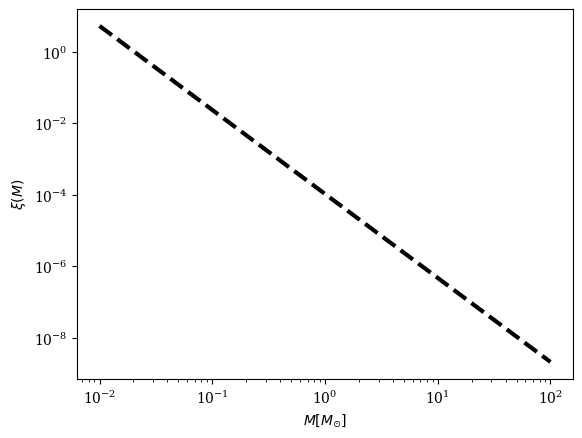

In [3]:
# Minimum and maximum mass size in solar masses unit
mass_min = 1e-2
mass_max = 1e2

# Power of the IMF
alpha = 2.35

# Create the mass vector
mass = np.logspace(np.log10(mass_min), np.log10(mass_max), 100)

#mass_norm_log = np.logspace(-2,2,10000)

#mass_norm_lin = np.linspace(0.01,100,10000)

#print("lin: ", mass_norm_lin)
#print("---------------")
#print("log: ", mass_norm_log)

#xi_0_arr_lin = 1/intgr(get_IMF(mass_norm_lin, alpha, 1))
#xi_0_arr_log = 1/intgr(get_IMF(mass_norm_log, alpha, 1))

#print("con array lin: ", xi_0_arr_lin)
#print("con array log: ", xi_0_arr_log)

# Normalisation of the IMF
IMF = lambda M: M**(-alpha)
xi_0 = 1/intgr(IMF, 0.0009, 1000)[0] # sembra funzionare

print("con funzione: ", xi_0)

# Plot in log scale   # non so perché ma non funziona
plt.loglog(mass, get_IMF(mass, alpha, xi_0), lw=3, color="k", ls="--")
plt.xlabel(r"$M  [M_{\odot}]$")
plt.ylabel(r"$\xi(M)$")

## Total number of stars

You can obtain the total number of stars by integrating the IMF over the mass range. The total number of stars is given by

$$ N = \int_{M_{\text{min}}}^{M_{\text{max}}} \xi(M) dM. $$

Try to perform this integration.

In [4]:
# Get the total number of stars

# Create the integration object
# Call your integration method to obtain the number of stars
N = intgr(get_IMF(mass, alpha, xi_0), mass_min, mass_max)

# Print the result
print(f"The total number of stars is {N:.0f}")

The integration is via the trapezoid method
The total number of stars is 24


## Average star mass

The average star mass can be compute quit strightforwardly:

$$ \hat{M} = \frac{\int_{M_{\text{min}}}^{M_{\text{max}}} M\xi(M) dM}{\int_{M_{\text{min}}}^{M_{\text{max}}} \xi(M) dM.}$$

After obtaining this number, what can we conclude?

In [5]:
# Compute the average star mass
M_hat = (intgr(get_IMF(mass, alpha, xi_0)*mass,mass_min, mass_max))/(intgr(get_IMF(mass, alpha, xi_0),mass_min, mass_max))

print(f"The average star mass is: {M_hat:.2e} solar masses")

The integration is via the trapezoid method
The integration is via the trapezoid method
The average star mass is: 1.74e-02 solar masses


In [6]:
def get_star_luminosity(M):
    """
    Get the star luminosity using the mass-luminosity
    relation

    Parameters
    ----------
    M : float
        Mass of the star
    
    Returns
    -------
    L : float
        Luminosity of the star
    """

    if M < 0.43:
        L = 0.23 * M**2.3
    elif 0.43 < M < 2:
        L = M**4
    elif 2 < M < 20:
        L = 1.5 * M**3.5
    elif M > 20:
        L = 3200 * M
    
    return L

In [7]:
# Compute average luminosity
L = np.zeros(mass.size)
for i,mi in enumerate (mass):
    L[i] = get_star_luminosity(mi)    


L_hat = (intgr(get_IMF(mass, alpha, xi_0)*L,mass_min, mass_max))/(intgr(get_IMF(mass, alpha, xi_0),mass_min, mass_max))

print(f"The average star luminosity is: {L_hat:.2e} solar luminosity")

The integration is via the trapezoid method
The integration is via the trapezoid method
The average star luminosity is: 3.63e-03 solar luminosity


Text(0, 0.5, '$L(M) [L_{\\odot}]$')

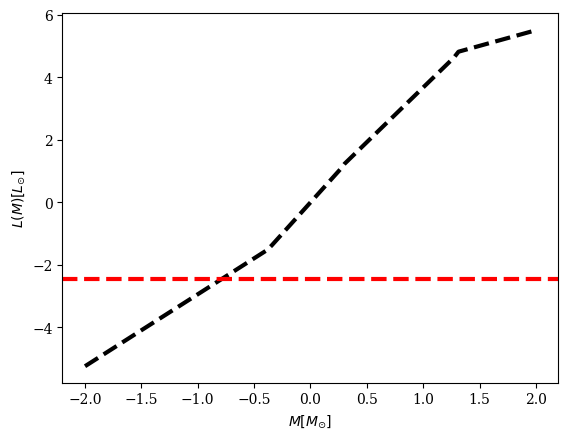

In [10]:
# Plot luminosity
plt.plot(np.log10(mass), np.log10([get_star_luminosity(m) for m in mass]), lw=3, color="k", ls="--")
plt.axhline(np.log10(L_hat), color="r", lw=3, ls="--", label="Average luminosity")
plt.xlabel(r"$M  [M_{\odot}]$")
plt.ylabel(r"$L(M) [L_{\odot}]$")
